In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
maoyan_data = pd.read_csv('maoyan.csv')

# 1.预览猫眼表数据情况

In [3]:
maoyan_data.head()

,title,starring,pub_time,score,styles,long_time
0,霸王别姬,"张国荣,张丰毅,巩俐",1993-07-26,9.5,"爱情,剧情",171
1,肖申克的救赎,"蒂姆·罗宾斯,摩根·弗里曼,鲍勃·冈顿",1994-09-10(加拿大),9.5,"犯罪,剧情",142
2,罗马假日,"格利高里·派克,奥黛丽·赫本,埃迪·艾伯特",1953-09-02(美国),9.1,"喜剧,剧情,爱情",118
3,这个杀手不太冷,"让·雷诺,加里·奥德曼,娜塔莉·波特曼",1994-09-14(法国),9.5,"剧情,惊悚,犯罪",110
4,泰坦尼克号,"莱昂纳多·迪卡普里奥,凯特·温丝莱特,比利·赞恩",1998-04-03,9.5,"历史,爱情,灾难",194


In [4]:
maoyan_data.shape


(100, 6)

In [5]:
maoyan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
title        100 non-null object
starring     100 non-null object
pub_time     100 non-null object
score        100 non-null float64
styles       100 non-null object
long_time    100 non-null int64
dtypes: float64(1), int64(1), object(4)
memory usage: 3.2+ KB


In [6]:
maoyan_data.isnull().sum()

title        0
starring     0
pub_time     0
score        0
styles       0
long_time    0
dtype: int64

数据完整，无缺失，根据要做的分析做简单数据处理，这里对上映日期分解出年，月

# 2.做简单数据处理

In [7]:
#根据上映时间pub_time,提取出上映年，月
#利用pandas里数据类型自带的str方法
maoyan_data['Year'] = maoyan_data['pub_time'].str.split('-',expand=True)[0]
maoyan_data['Month'] = maoyan_data['pub_time'].str.split('-',expand=True)[1]


In [8]:
#根据上映时间pub_time,初步提取出国家来
maoyan_data['Country'] = maoyan_data['pub_time'].str.split('(',expand=True)[1].str.strip(')')

In [9]:
maoyan_data.head(10)

,title,starring,pub_time,score,styles,long_time,Year,Month,Country
0,霸王别姬,"张国荣,张丰毅,巩俐",1993-07-26,9.5,"爱情,剧情",171,1993,07,None
1,肖申克的救赎,"蒂姆·罗宾斯,摩根·弗里曼,鲍勃·冈顿",1994-09-10(加拿大),9.5,"犯罪,剧情",142,1994,09,加拿大
2,罗马假日,"格利高里·派克,奥黛丽·赫本,埃迪·艾伯特",1953-09-02(美国),9.1,"喜剧,剧情,爱情",118,1953,09,美国
3,这个杀手不太冷,"让·雷诺,加里·奥德曼,娜塔莉·波特曼",1994-09-14(法国),9.5,"剧情,惊悚,犯罪",110,1994,09,法国
4,泰坦尼克号,"莱昂纳多·迪卡普里奥,凯特·温丝莱特,比利·赞恩",1998-04-03,9.5,"历史,爱情,灾难",194,1998,04,None
5,唐伯虎点秋香,"周星驰,巩俐,郑佩佩",1993-07-01(中国香港),9.1,"喜剧,爱情,古装",102,1993,07,中国香港
6,乱世佳人,"费雯·丽,克拉克·盖博,奥利维娅·德哈维兰",1939-12-15(美国),9.1,"剧情,爱情,战争",238,1939,12,美国
7,魂断蓝桥,"费雯·丽,罗伯特·泰勒,露塞尔·沃特森",1940-05-17(美国),9.2,"剧情,战争,爱情",108,1940,05,美国
8,辛德勒的名单,"连姆·尼森,拉尔夫·费因斯,本·金斯利",1993-12-15(美国),9.2,"剧情,历史,战争",195,1993,12,美国
9,天空之城,"寺田农,鹫尾真知子,龟山助清",1992-05-01,9.0,"动画,冒险,家庭",125,1992,05,None


In [10]:
maoyan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
title        100 non-null object
starring     100 non-null object
pub_time     100 non-null object
score        100 non-null float64
styles       100 non-null object
long_time    100 non-null int64
Year         100 non-null object
Month        99 non-null object
Country      55 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 4.4+ KB


In [11]:
#国家数据不统一，可以查看现在国家数据情况
data = maoyan_data.groupby('Country')
data.count()

,title,starring,pub_time,score,styles,long_time,Year,Month
Country,,,,,,,,
中国香港,4,4,4,4,4,4,4,4
加拿大,1,1,1,1,1,1,1,1
巴西,1,1,1,1,1,1,1,1
德国,1,1,1,1,1,1,1,1
意大利,1,1,1,1,1,1,1,1
日本,5,5,5,5,5,5,5,5
法国,6,6,6,6,6,6,6,6
法国戛纳,1,1,1,1,1,1,1,1
美国,25,25,25,25,25,25,25,25


In [12]:
maoyan_data.isnull().sum()

title         0
starring      0
pub_time      0
score         0
styles        0
long_time     0
Year          0
Month         1
Country      45
dtype: int64

# 3.数据可视化分析

In [52]:
year_data = maoyan_data.groupby(['Year'])
year_pic_data1 = year_data.size()
year_pic_data2 = year_data['score'].mean()
# year_pic_data1
# year_pic_data2

array([<matplotlib.axes._subplots.AxesSubplot object at 0x08102910>,
      dtype=object)

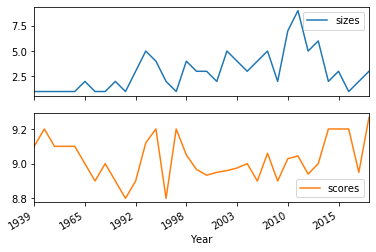

In [49]:
year_pic = pd.DataFrame({'sizes':year_pic_data1,'scores':year_pic_data2})
year_pic.plot(subplots=True)


Top100榜电影时间跨度大1939-2019共跨80年，其中在93年2011年进入top电影数量出现峰值5部和9部

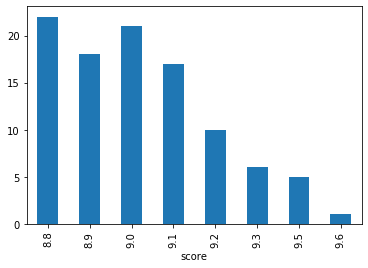

In [54]:
score_pic_data = maoyan_data.groupby('score').size()
score_pic_data.plot(kind='bar')

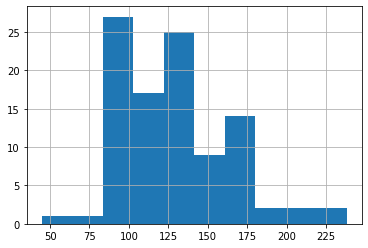

In [67]:
long_time_pic_data = maoyan_data['long_time']
long_time_pic_data.hist()

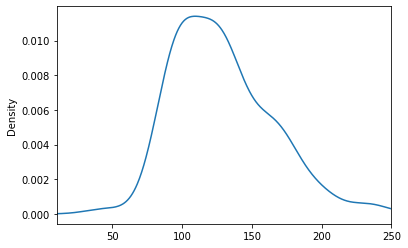

In [66]:
long_time_pic_data.dropna().plot(kind='kde', xlim=(10,250))